#**Name - Abhishek Yadav(Master's CS & AI)**


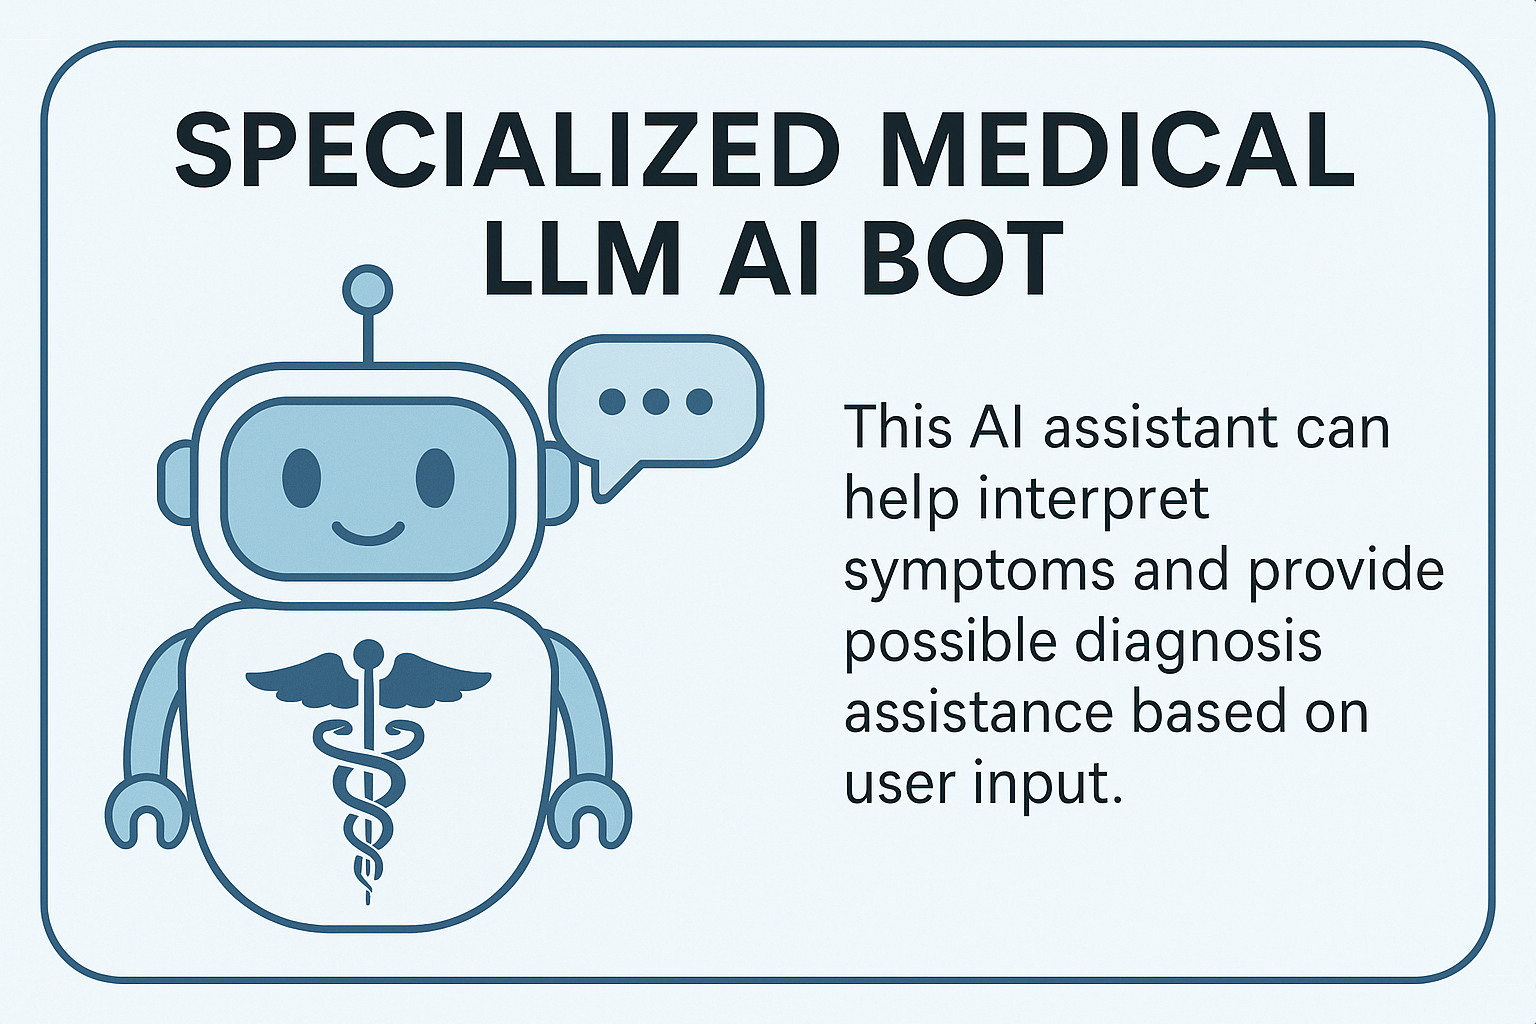

### Project Overview - In this capstone project, we will embark on an exciting journey to create an Industry-Specific Large Language Model (LLM) Bot using state-of-the-art pre-trained models from sources like Hugging Face. The primary objective is to build an intelligent bot that can effectively engage with users by answering questions and providing insights specific to a chosen industry. This project will not only enhance your technical skills but also provide a deep understanding of the chosen industry's nuances, challenges, and trends.

### Dataset link - https://huggingface.co/datasets/FreedomIntelligence/medical-o1-reasoning-SFT

###Github link - https://github.com/Roony0708/SPECIALIZED_MEDICAL_LLM_AI_BOT

#**1. Install required dependies**

In [ ]:
# install unsloth
!pip install --force-reinstall --no-cache-dir --no-deps git+https://github.com/unslothai/unsloth.git

# Install TRL, PEFT, and xformers (specific versions)
!pip install trl==0.14.0 peft==0.14.0 xformers==0.0.28.post3

# Install PyTorch and torchvision (correct index URL from official PyTorch)
!pip install torch==2.5.1 torchvision==0.20.1 --index-url https://download.pytorch.org/whl/cu124

  Cloning https://github.com/unslothai/unsloth.git to /tmp/pip-req-build-iov8gxjz
  Running command git clone --filter=blob:none --quiet https://github.com/unslothai/unsloth.git /tmp/pip-req-build-iov8gxjz
  Resolved https://github.com/unslothai/unsloth.git to commit e6d0877695452b1291ffa17f961397a3a4c21941
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for unsloth: filename=unsloth-2025.7.9-py3-none-any.whl size=299855 sha256=bf814ad49b5809aa746709271013f34ce37e026604beea4356b88cc010765167
  Stored in directory: /tmp/pip-ephem-wheel-cache-vsvxb2ng/wheels/d1/17/05/850ab10c33284a4763b0595cd8ea9d01fce6e221cac24b3c01
Successfully built unsloth
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.9/313.9 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.8/374.8 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 91.7 MB/s eta 0:00:00
   ━━━━

In [ ]:
!pip install bitsandbytes


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 MB 10.1 MB/s eta 0:00:00


In [ ]:
!pip install unsloth_zoo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.5/166.5 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 11.3 MB/s eta 0:00:00
  Attempting uninstall: datasets
    Found existing installation: datasets 4.0.0
    Uninstalling datasets-4.0.0:
      Successfully uninstalled datasets-4.0.0


In [ ]:
# Import necessary libraries
from unsloth import FastLanguageModel
import torch
from trl import SFTTrainer
from unsloth import is_bfloat16_supported
from huggingface_hub import login
from transformers import TrainingArguments
from datasets import load_dataset
import wandb

Unsloth: Patching Xformers to fix some performance issues.
🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!


In [ ]:
# Check HF token
from google.colab import userdata
hf_token = userdata.get('HF_API')
login(hf_token)

In [ ]:
# Check GPU availability
# Test if CUDA is available
import torch
print("CUDA available:", torch.cuda.is_available())
print("GPU device:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")

CUDA available: True
GPU device: Tesla T4


#2. Setup pretrained DeepSeek-R1

In [ ]:
model_name = "deepseek-ai/DeepSeek-R1-Distill-Llama-8B"
max_sequence_length = 2048
dtype = None
load_in_4bit = True

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = model_name,
    max_seq_length = max_sequence_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
    token = hf_token
)

==((====))==  Unsloth 2025.7.9: Fast Llama patching. Transformers: 4.53.3.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.5.1+cu124. CUDA: 7.5. CUDA Toolkit: 12.4. Triton: 3.1.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.28.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/5.96G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/236 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

chat_template.jinja: 0.00B [00:00, ?B/s]

In [ ]:
# Setup system prompt
prompt_style = """
Below is a task description along with additional context provided in the input section. Your goal is to provide a well-reasoned response that effectively addresses the request.

Before crafting your answer, take a moment to carefully analyze the question. Develop a clear, step-by-step thought process to ensure your response is both logical and accurate.

### Task:
You are a medical expert specializing in clinical reasoning, diagnostics, and treatment planning. Answer the medical question below using your advanced knowledge.

### Query:
{}

### Answer:
<think>{}
"""

In [ ]:
# Run Inference on the model

# Define a test question
question = """A 61-year-old woman with a long history of involuntary urine loss during activities like coughing or
              sneezing but no leakage at night undergoes a gynecological exam and Q-tip test. Based on these findings,
              what would cystometry most likely reveal about her residual volume and detrusor contractions?"""

FastLanguageModel.for_inference(model)

# Tokenize the input
inputs = tokenizer([prompt_style.format(question, "")], return_tensors="pt").to("cuda")

# Generate a response
outputs = model.generate (
    input_ids = inputs.input_ids,
    attention_mask = inputs.attention_mask,
    max_new_tokens = 1200,
    use_cache = True
)

# Decode the response tokens back to text
response = tokenizer.batch_decode(outputs)


print(response)



["<｜begin▁of▁sentence｜>\nBelow is a task description along with additional context provided in the input section. Your goal is to provide a well-reasoned response that effectively addresses the request.\n\nBefore crafting your answer, take a moment to carefully analyze the question. Develop a clear, step-by-step thought process to ensure your response is both logical and accurate.\n\n### Task:\nYou are a medical expert specializing in clinical reasoning, diagnostics, and treatment planning. Answer the medical question below using your advanced knowledge.\n\n### Query:\nA 61-year-old woman with a long history of involuntary urine loss during activities like coughing or\n              sneezing but no leakage at night undergoes a gynecological exam and Q-tip test. Based on these findings,\n              what would cystometry most likely reveal about her residual volume and detrusor contractions?\n\n### Answer:\n<think>\nOkay, so I'm trying to figure out what cystometry would show for this

In [ ]:
print(response[0].split("### Answer:")[1])


<think>
Okay, so I'm trying to figure out what cystometry would show for this 61-year-old woman. Let me start by going through what I know.

She's been having involuntary urine loss when she coughs or sneezes but doesn't leak at night. That makes me think about stress urinary incontinence. I remember that stress UI is often due to the urethral sphincter not closing properly during activities like coughing. So, maybe a cystometry, which is also called a bladder diary study, could help.

In a cystometry, they measure how much the bladder can hold and how it contracts. The residual volume is the amount left in the bladder after voiding. If she's losing urine involuntarily, maybe her residual volume is normal, but her bladder isn't contracting well during a cough.

Wait, but stress incontinence is usually about the sphincter, not the bladder's contractility. So, the detrusor muscles (the ones that squeeze the bladder) should still contract normally. But during a Q-tip test, which measures

#3. Setup fine-tuning

In [ ]:

# Load Dataset
medical_dataset = load_dataset("FreedomIntelligence/medical-o1-reasoning-SFT", "en", split = "train[:1000]", trust_remote_code = True)

README.md: 0.00B [00:00, ?B/s]

medical_o1_sft.json:   0%|          | 0.00/58.2M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/19704 [00:00<?, ? examples/s]

In [ ]:
medical_dataset[1]

{'Question': 'A 33-year-old woman is brought to the emergency department 15 minutes after being stabbed in the chest with a screwdriver. Given her vital signs of pulse 110/min, respirations 22/min, and blood pressure 90/65 mm Hg, along with the presence of a 5-cm deep stab wound at the upper border of the 8th rib in the left midaxillary line, which anatomical structure in her chest is most likely to be injured?',
 'Complex_CoT': "Okay, let's figure out what's going on here. A woman comes in with a stab wound from a screwdriver. It's in her chest, upper border of the 8th rib, left side, kind of around the midaxillary line. First thought, that's pretty close to where the lung sits, right?\n\nLet's talk about location first. This spot is along the left side of her body. Above the 8th rib, like that, is where a lot of important stuff lives, like the bottom part of the left lung, possibly the diaphragm too, especially considering how deep the screwdriver went.\n\nThe wound is 5 cm deep. Tha

In [ ]:
# Define EOS_TOKEN which tells the model when to stop generating text during training
EOS_TOKEN = tokenizer.eos_token
EOS_TOKEN

'<｜end▁of▁sentence｜>'

In [ ]:

# Updated training prompt style to add </think> tag
train_prompt_style = """Below is an instruction that describes a task, paired with an input that provides further context.
Write a response that appropriately completes the request.
Before answering, think carefully about the question and create a step-by-step chain of thoughts to ensure a logical and accurate response.

### Instruction:
You are a medical expert with advanced knowledge in clinical reasoning, diagnostics, and treatment planning.
Please answer the following medical question.

### Question:
{}

### Response:
<think>
{}
</think>
{}"""



In [ ]:
# Prepare the data for fine-tuning

def preprocess_input_data(examples):
  inputs = examples["Question"]
  cots = examples["Complex_CoT"]
  outputs = examples["Response"]

  texts = []

  for input, cot, output in zip(inputs, cots, outputs):
    text = train_prompt_style.format(input, cot, output) + EOS_TOKEN
    texts.append(text)

  return {
      "texts" : texts,
  }

In [ ]:
finetune_dataset = medical_dataset.map(preprocess_input_data, batched = True)

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [ ]:
print(finetune_dataset[0])
print(finetune_dataset.column_names)


{'Question': 'Given the symptoms of sudden weakness in the left arm and leg, recent long-distance travel, and the presence of swollen and tender right lower leg, what specific cardiac abnormality is most likely to be found upon further evaluation that could explain these findings?', 'Complex_CoT': "Okay, let's see what's going on here. We've got sudden weakness in the person's left arm and leg - and that screams something neuro-related, maybe a stroke?\n\nBut wait, there's more. The right lower leg is swollen and tender, which is like waving a big flag for deep vein thrombosis, especially after a long flight or sitting around a lot.\n\nSo, now I'm thinking, how could a clot in the leg end up causing issues like weakness or stroke symptoms?\n\nOh, right! There's this thing called a paradoxical embolism. It can happen if there's some kind of short circuit in the heart - like a hole that shouldn't be there.\n\nLet's put this together: if a blood clot from the leg somehow travels to the le

In [ ]:
finetune_dataset["texts"][0]

"Below is an instruction that describes a task, paired with an input that provides further context.\nWrite a response that appropriately completes the request.\nBefore answering, think carefully about the question and create a step-by-step chain of thoughts to ensure a logical and accurate response.\n\n### Instruction:\nYou are a medical expert with advanced knowledge in clinical reasoning, diagnostics, and treatment planning.\nPlease answer the following medical question.\n\n### Question:\nGiven the symptoms of sudden weakness in the left arm and leg, recent long-distance travel, and the presence of swollen and tender right lower leg, what specific cardiac abnormality is most likely to be found upon further evaluation that could explain these findings?\n\n### Response:\n<think>\nOkay, let's see what's going on here. We've got sudden weakness in the person's left arm and leg - and that screams something neuro-related, maybe a stroke?\n\nBut wait, there's more. The right lower leg is sw

#4. Setup/Apply LoRA finetuning to the model

In [ ]:
model_lora = FastLanguageModel.get_peft_model(
    model = model,
    r = 16,
    target_modules = [
        "q_proj",
        "k_proj",
        "v_proj",
        "o_proj",
        "gate_proj",
        "up_proj",
        "down_proj"
    ],
    lora_alpha = 16,
    lora_dropout = 0,
    bias = "none",
    use_gradient_checkpointing = "unsloth",
    random_state = 3047,
    use_rslora = False,
    loftq_config = None
)

Unsloth 2025.7.9 patched 32 layers with 32 QKV layers, 32 O layers and 32 MLP layers.


In [ ]:
# Add this before creating the trainer
if hasattr(model, '_unwrapped_old_generate'):
    del model._unwrapped_old_generate

In [ ]:
trainer = SFTTrainer(
    model = model_lora,
    tokenizer = tokenizer,
    train_dataset = finetune_dataset,
    # dataset_text_field = "texts",
    formatting_func = lambda examples: examples["texts"],
    max_seq_length = max_sequence_length,
    dataset_num_proc = 1,

    args = TrainingArguments(
        per_device_train_batch_size = 2,
        gradient_accumulation_steps = 4,
        num_train_epochs = 1,
        warmup_steps = 5,
        max_steps = 60,
        learning_rate = 2e-4,
        fp16 = not is_bfloat16_supported(),
        bf16 = is_bfloat16_supported(),
        logging_steps = 10,
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = "outputs",
    ),
)

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

# 5. Setup WANDB (Weights and biasis)

In [ ]:

from google.colab import userdata
wnb_token = userdata.get("WANDB_API")
# Login to WnB
wandb.login(key=wnb_token) # import wandb
run = wandb.init(
    project='Fine-tune-DeepSeek-R1-on-Medical-CoT-Dataset',
    job_type="training",
    anonymous="allow"
)

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: ydabhi1999 (ydabhi1999-woolf) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


#6. Start the fine-tuning process

In [ ]:

trainer_stats = trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 1,000 | Num Epochs = 1 | Total steps = 60
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 41,943,040 of 8,072,204,288 (0.52% trained)
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


Unsloth: Will smartly offload gradients to save VRAM!


Step,Training Loss
10,1.944700
20,1.429500
30,1.404200
40,1.366900
50,1.402500
60,1.338800


In [ ]:
wandb.finish()

train/epoch,▁▂▄▅▇██
train/global_step,▁▂▄▅▇██
train/grad_norm,█▂▂▃▁▁
train/learning_rate,█▇▅▄▂▁
train/loss,█▂▂▁▂▁
total_flos,1.6656601164742656e+16
train/epoch,0.48
train/global_step,60
train/grad_norm,0.26311
train/learning_rate,0.0
train/loss,1.3388


# 7. Saving the model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
model.save_pretrained("/content/drive/MyDrive/ML/AI_MED_ASSIST/lora_model")
tokenizer.save_pretrained("/content/drive/MyDrive/ML/AI_MED_ASSIST/lora_model")


('/content/drive/MyDrive/ML/AI_MED_ASSIST/lora_model/tokenizer_config.json',
 '/content/drive/MyDrive/ML/AI_MED_ASSIST/lora_model/special_tokens_map.json',
 '/content/drive/MyDrive/ML/AI_MED_ASSIST/lora_model/chat_template.jinja',
 '/content/drive/MyDrive/ML/AI_MED_ASSIST/lora_model/tokenizer.json')

# 8. Testing after fine-tuning

In [ ]:
# Step10: Testing after fine-tuning
question = """A 61-year-old woman with a long history of involuntary urine loss during activities like coughing or sneezing
              but no leakage at night undergoes a gynecological exam and Q-tip test. Based on these findings,
              what would cystometry most likely reveal about her residual volume and detrusor contractions?"""

FastLanguageModel.for_inference(model_lora)

# Tokenize the input
inputs = tokenizer([prompt_style.format(question, "")], return_tensors="pt").to("cuda")

# Generate a response
outputs = model_lora.generate (
    input_ids = inputs.input_ids,
    attention_mask = inputs.attention_mask,
    max_new_tokens = 1200,
    use_cache = True
)

# Decode the response tokens back to text
response = tokenizer.batch_decode(outputs)

print(response)

["<｜begin▁of▁sentence｜>\nBelow is a task description along with additional context provided in the input section. Your goal is to provide a well-reasoned response that effectively addresses the request.\n\nBefore crafting your answer, take a moment to carefully analyze the question. Develop a clear, step-by-step thought process to ensure your response is both logical and accurate.\n\n### Task:\nYou are a medical expert specializing in clinical reasoning, diagnostics, and treatment planning. Answer the medical question below using your advanced knowledge.\n\n### Query:\nA 61-year-old woman with a long history of involuntary urine loss during activities like coughing or sneezing\n              but no leakage at night undergoes a gynecological exam and Q-tip test. Based on these findings,\n              what would cystometry most likely reveal about her residual volume and detrusor contractions?\n\n### Answer:\n<think>\nAlright, let's think about this 61-year-old woman who's been having s

In [ ]:
print(response[0].split("### Answer:")[1])


<think>
Alright, let's think about this 61-year-old woman who's been having some issues with her bladder. She's been dealing with involuntary urine loss, especially when she coughs or sneezes. That sounds like a common issue, especially if she's older. Okay, so she's been having these episodes, but interestingly, she hasn't experienced any leakage at night. That's curious. It might mean that her bladder doesn't get too full during the day, or perhaps her sphincter is functioning better when she's lying down.

Now, she's had a gynecological exam and the Q-tip test. Let's unpack that. The Q-tip test is used to check the function of her sphincter. If the tip of the Q-tip is wet after the test, it suggests that her sphincter isn't fully closing. That could be a problem because it might lead to leakage. If it's dry, it suggests the sphincter is working fine, which is good news.

Moving on, let's think about what cystometry would reveal. This test is crucial for understanding how her bladde

In [ ]:
question = """A 59-year-old man presents with a fever, chills, night sweats, and generalized fatigue,
              and is found to have a 12 mm vegetation on the aortic valve. Blood cultures indicate gram-positive, catalase-negative,
              gamma-hemolytic cocci in chains that do not grow in a 6.5% NaCl medium.
              What is the most likely predisposing factor for this patient's condition?"""

FastLanguageModel.for_inference(model_lora)

# Tokenize the input
inputs = tokenizer([prompt_style.format(question, "")], return_tensors="pt").to("cuda")

# Generate a response
outputs = model_lora.generate (
    input_ids = inputs.input_ids,
    attention_mask = inputs.attention_mask,
    max_new_tokens = 1200,
    use_cache = True
)

# Decode the response tokens back to text
response = tokenizer.batch_decode(outputs)

print(response[0].split("### Answer:")[1])




<think>
Okay, so we have a 59-year-old man who's been feeling pretty unwell. He has a fever, chills, and even night sweats. That sounds like he's dealing with a systemic infection, maybe something like endocarditis. Now, let's look at the lab results. There's a vegetation on the aortic valve that's 12 mm, and it's a gram-positive, catalase-negative, gamma-hemolytic cocci in chains. Hmm, those characteristics are really pointing towards a specific type of bacteria. I think this could be a case of Enterococcus faecium, since it's known for those gamma-hemolytic properties and not growing in a high-salt environment like 6.5% NaCl. 

Now, thinking about the predisposing factors, let's see. The presence of aortic valve vegetation suggests he might have had some kind of heart condition that led to this infection. The most common scenario with this type of bacteria is if there was a previous heart surgery or a heart valve replacement. But let's not stop there. What about if he had a previous